In [13]:
# the goal in this notebook is to create parallel branches in the model using sequential models as subunits

# import libraries necessary for building the CNN
import numpy as np
import keras
from keras.layers import Input, Conv2D, Dense, Activation, Flatten, Concatenate
from keras.models import Sequential, Model
from keras.datasets import mnist

In [14]:
# for plotting the model
# !pip install pydot
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [15]:
# important variables
num_classes = 10 # one for each of the digits from 0-9
batch_size = 128 #tunable number
epochs = 5 #tunable number

In [16]:
# import mnist data from keras
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape the x data do it's 4 dimensional --> I think the last dimension represents color channels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# we need to normalize the X data before feeding into our model
X_train = X_train/255
X_test = X_test/255

# we also need to convert the Y data into one-hot vectors
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [17]:
# building the architecture of the convolutional model
input_shape = (28,28,1)

model = Sequential() #this will allow us to build a linear stack of layers --> hmmm is this restrictive in any way?
                    # we may not want to limit folks to only a linear stack of layers, because this could
                    # prevent them from making cool skip connections and stuff like that . . . something to consider

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
#model.add(Flatten())
#model.add(Dense(num_classes, activation='softmax'))

In [18]:
# try to access output shape of convo layer
branch_input = model.layers[0].output_shape

In [24]:
model02 = Sequential()
model02.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
#model02.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

In [25]:
X_input = Input(input_shape)

X = model(X_input)
X02 = model02(X_input)

X03 = Concatenate(axis=-1)([X, X02])

X03 = Flatten()(X03)
X03 = Dense(num_classes, activation='softmax') (X03)

model03 = Model(inputs=X_input, outputs = X03, name='model03')

In [26]:
# compile the model
model03.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [28]:
# train the model on the training data
model03.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 55s 915us/step - loss: 0.0994 - acc: 0.9721 - val_loss: 0.0666 - val_acc: 0.9790
Epoch 2/13
60000/60000 [==============================] - 52s 871us/step - loss: 0.0559 - acc: 0.9837 - val_loss: 0.0601 - val_acc: 0.9806
Epoch 3/13
60000/60000 [==============================] - 51s 850us/step - loss: 0.0411 - acc: 0.9876 - val_loss: 0.0537 - val_acc: 0.9833
Epoch 4/13
60000/60000 [==============================] - 51s 855us/step - loss: 0.0310 - acc: 0.9912 - val_loss: 0.0564 - val_acc: 0.9824
Epoch 5/13
33280/60000 [===============>..............] - ETA: 22s - loss: 0.0217 - acc: 0.9934

KeyboardInterrupt: 

In [6]:
#model = keras.models.load_model("./CNN01")

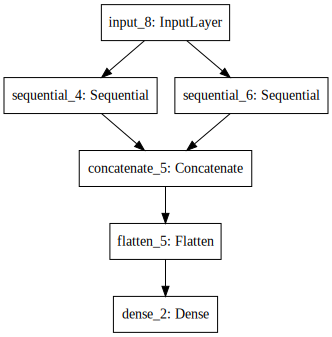

In [29]:
#import pydot
#plot_model(model, to_file='model01.png')
SVG(model_to_dot(model03).create(prog='dot', format="svg"))